/Users/imranidham/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Map(center=[31.5, 34.45], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Output()

DatePicker(value=None, description='Start Time', step=1)

DatePicker(value=None, description='End Time', step=1)

Button(description='Done', style=ButtonStyle())

TCC Image:
Authenticated using refresh token.


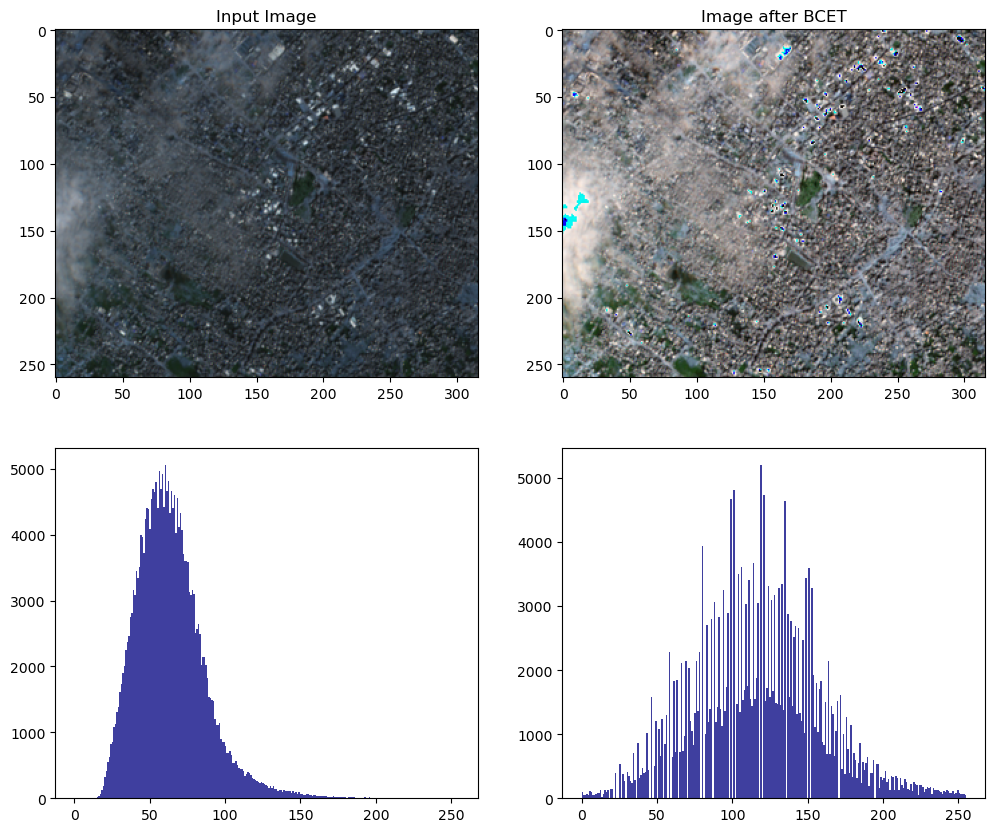

TCC Image Masked:
Authenticated using refresh token.


/Users/imranidham/SourceCode/eo_processing/BCET.py:19: RuntimeWarning: overflow encountered in scalar add
  a = (Gmax - Gmin) / ((Lmax - Lmin) * (Lmax + Lmin - 2 * b))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


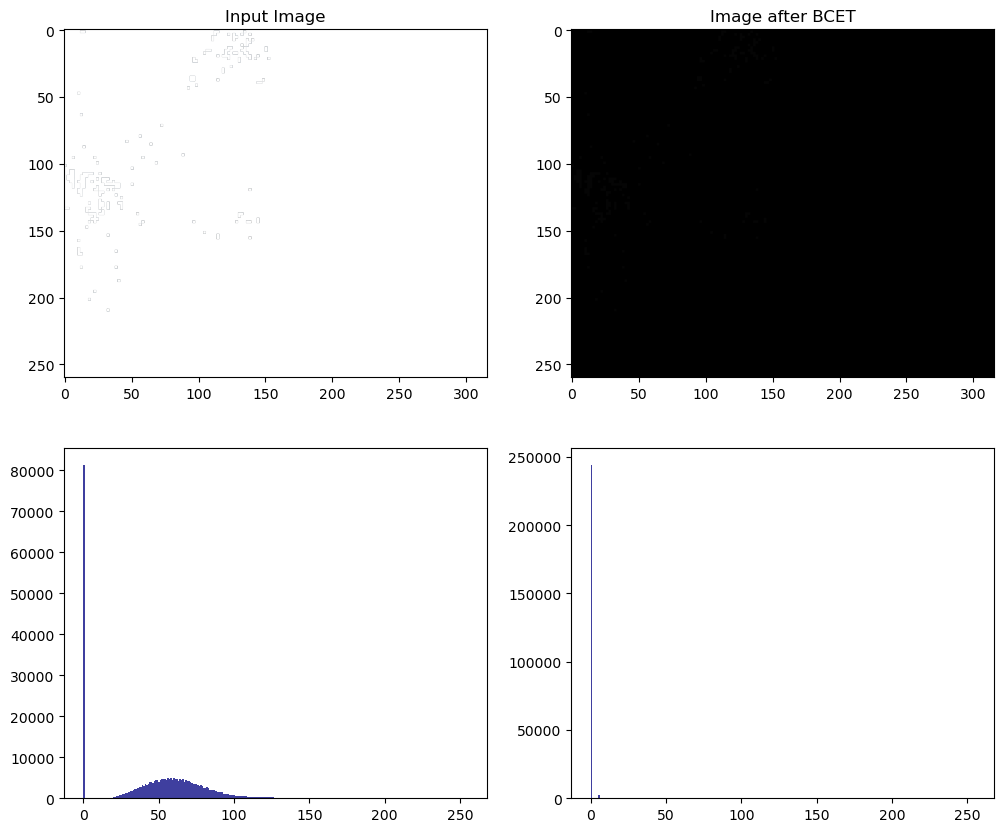

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import openeo
import shapely.geometry
from shapely.geometry import Polygon, box, MultiPolygon
from shapely.ops import unary_union
from ipyleaflet import Map, basemaps, DrawControl, GeoData
from ipywidgets import Button, Output, DatePicker
from IPython.display import display
import LCE
import BCET
from openeo.processes import ProcessBuilder
import functions2
import datetime as dt

# Create a map
m = Map(center=(31.5, 34.45), zoom=5, basemap=basemaps.OpenStreetMap.Mapnik)

# Create a draw control
draw_control = DrawControl(polygon={'shapeOptions': {'color': '#0000FF'}})
m.add_control(draw_control)

# Display the map
display(m)

# Create an output widget to display results
output = Output()
display(output)

# Create date picker widgets for the start and end time
start_time_picker = DatePicker(description='Start Time')
end_time_picker = DatePicker(description='End Time')
press_this = Button(description='Done')

display(start_time_picker)
display(end_time_picker)
display(press_this)

polygon = None
# One square is 555m at equator
# Function to execute when a new shape is drawn
def handle_draw(self, action, geo_json):
    global polygon
    # Get the coordinates of the polygon
    coords = geo_json['geometry']['coordinates'][0]
    polygon = Polygon(coords)

    # Define the size of square sections (in degrees)
    square_size = 0.005

    # Create a grid of squares within area of interest
    squares = []
    for x in np.arange(min([coord[0] for coord in coords]), max([coord[0] for coord in coords]), square_size):
        for y in np.arange(min([coord[1] for coord in coords]), max([coord[1] for coord in coords]), square_size):
            square = box(x, y, x+square_size, y+square_size)
            if polygon.intersects(square):
                squares.append(square)

    # Create a GeoDataFrame for the squares
    squares_gdf = gpd.GeoDataFrame(gpd.GeoSeries(squares), columns=['geometry'])

    # Display the squares on the map
    m.add_layer(GeoData(geo_dataframe=squares_gdf))

# Attach the function to the draw control
draw_control.on_draw(handle_draw)

# Function to execute when the 'Done' button is clicked
def handle_button_click(b):
    global polygon
    start_time = start_time_picker.value.strftime('%Y-%m-%d')
    end_time = end_time_picker.value.strftime('%Y-%m-%d')

    # print('SAR image:')
    # functions2.sar(polygon, start_time, end_time)
    print('TCC Image:')
    functions2.tcc(polygon, start_time, end_time)
    print('TCC Image Masked:')
    functions2.tcc_masked(polygon, start_time, end_time)
    # print('FCC Image:')
    # functions2.fcc(polygon, start_time, end_time)
    # print('NBR Image (high DN is healthy):')
    # functions2.nbr(polygon, start_time, end_time)
    # print('NDVI Image (high DN is healthy):')
    # functions2.ndvi(polygon, start_time, end_time)


press_this.on_click(handle_button_click)
